# Analisis Exploratorio (MNIST)

## Cargue de librerias y datos

In [1]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os
import time
import shutil
import pathlib
import itertools
# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from skimage.io import imread, imshow
from skimage.transform import resize
from PIL import Image
from collections import defaultdict
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import cv2
import dash_bootstrap_components as dbc
import tensorflow as tf
import base64
from PIL import Image
import io
import requests
from io import StringIO,BytesIO
from skimage.filters import gaussian
from skimage import feature, img_as_ubyte, transform
from scipy.ndimage import gaussian_filter as gaussian
from tensorflow.keras.models import load_model
import tempfile
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
from tensorflow_probability.python.layers import DenseVariational, DenseReparameterization, DenseFlipout, Convolution2DFlipout, Convolution2DReparameterization
from tensorflow_probability.python.layers import DistributionLambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.layers import Input as KerasInput
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import *
tf.compat.v1.enable_eager_execution()
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow_probability.python.layers import Convolution2DFlipout, DenseFlipout
from scipy.stats import shapiro
import plotly.express as px

In [2]:
# Cargar el conjunto de datos MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Mapeo de etiquetas a números
label_mapping = {0: 'cero', 1: 'uno', 2: 'dos', 3: 'tres', 4: 'cuatro', 5: 'cinco', 6: 'seis', 7: 'siete', 8: 'ocho', 9: 'nueve'}

In [8]:
import nbformat
print(nbformat.__version__)


5.10.4


In [16]:
from scipy.stats import shapiro
import numpy as np
import plotly.express as px

## Analisis Exploratorio de las imagenes

In [3]:
x_train = X_train / 255.0

# Calcular la distribución de la intensidad de los píxeles para cada dígito
intensity_distributions = []
for digit in range(10):
    digit_indices = np.where(y_train == digit)[0]
    digit_intensities = x_train[digit_indices].mean(axis=(0, 1))
    intensity_distributions.append(digit_intensities)

# Crear un gráfico de líneas con área bajo la curva para mostrar la distribución de intensidad de los píxeles para cada dígito
fig = go.Figure()

for digit, intensities in enumerate(intensity_distributions):
    fig.add_trace(go.Scatter(x=np.arange(0, 784), y=intensities,
                             mode='lines',
                             name=str(digit),
                             fill='tozeroy'))

fig.update_layout(title="Distribución de la Intensidad de los Píxeles para Cada Dígito",
                  xaxis_title="Pixel",
                  yaxis_title="Intensidad Media")

fig.show()

podemos ver que la distribucion de la intensidad de los digitos aunque estan en los mismos rangos, tienen valores esperados muy diferentes, por ejemplo el digito 0 tiene al parecer dos modas y la mayoria parcer no distribuir normal, la mas cercana puede ser
la distribucion del digito 1 

In [11]:
digit_1_indices = np.where(y_train == 1)[0]
digit_1_intensities = x_train[digit_1_indices].mean(axis=(0, 1))

# Realizar la prueba de Shapiro-Wilk para la normalidad
statistic, p_value = shapiro(digit_1_intensities)

# Imprimir el resultado
print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

if p_value > 0.05:
    print("No se rechaza la hipótesis nula (la distribución es normal)")
else:
    print("Se rechaza la hipótesis nula (la distribución no es normal)")

Estadístico de prueba: 0.6698668668397405
Valor p: 1.0988225561840675e-06
Se rechaza la hipótesis nula (la distribución no es normal)


con esto validamos de que aunque la distribucion de intensidad parece distribuir normal, pues en realidad esta distribucion no refleja esta naturaleza de nuestros datos.

In [23]:
# Calcular los tamaños de las imágenes
sizes = [img.shape for img in x_train]

# Calcular los ratios de aspecto de las imágenes
ratios = [shape[1] / shape[0] for shape in sizes]

# Calcular los tamaños de las imágenes para cada dígito
digit_sizes = [[] for _ in range(10)]
for img, label in zip(x_train, y_train):
    digit_sizes[label].append(img.shape[0])

# Crear el gráfico interactivo para la distribución de tamaños
fig1 = go.Figure()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'pink']
for digit, sizes in enumerate(digit_sizes):
    fig1.add_trace(go.Histogram(x=sizes, nbinsx=20,
                                 marker_color=colors[digit],
                                 name=f'Dígito {digit}'))
fig1.update_layout(title='Distribución de Tamaños de Imágenes por Dígito',
                   xaxis_title='Ancho',
                   yaxis_title='Frecuencia',
                   hovermode="closest")
fig1.update_traces(hovertemplate="Ancho: %{x}<br>Frecuencia: %{y}")

# Calcular los ratios de aspecto de las imágenes para cada dígito
digit_ratios = [[] for _ in range(10)]
for img, label in zip(x_train, y_train):
    digit_ratios[label].append(img.shape[1] / img.shape[0])

# Crear el gráfico interactivo para la distribución de ratios de aspecto
fig2 = go.Figure()
for digit, ratios in enumerate(digit_ratios):
    fig2.add_trace(go.Histogram(x=ratios, nbinsx=20,
                                 marker_color=colors[digit],
                                 name=f'Dígito {digit}'))
fig2.update_layout(title='Distribución de Relaciones de Aspecto de Imágenes por Dígito',
                   xaxis_title='Relación de Aspecto (Ancho/Altura)',
                   yaxis_title='Frecuencia',
                   hovermode="closest")
fig2.update_traces(hovertemplate="Relación de Aspecto: %{x}<br>Frecuencia: %{y}")

# Mostrar los gráficos
fig1.show()
fig2.show()

podemos ver que aqui dos cosas primero no esta desbalanceado los digitos es decir no hay una clase con una gran diferencia en cuestion de precensia en el dataset frente a las demas, la que mayor tiene es el digito 1, y podemos ver con el tooltip que la relacion es 1 para todos los digitos y el tamaño tambien.

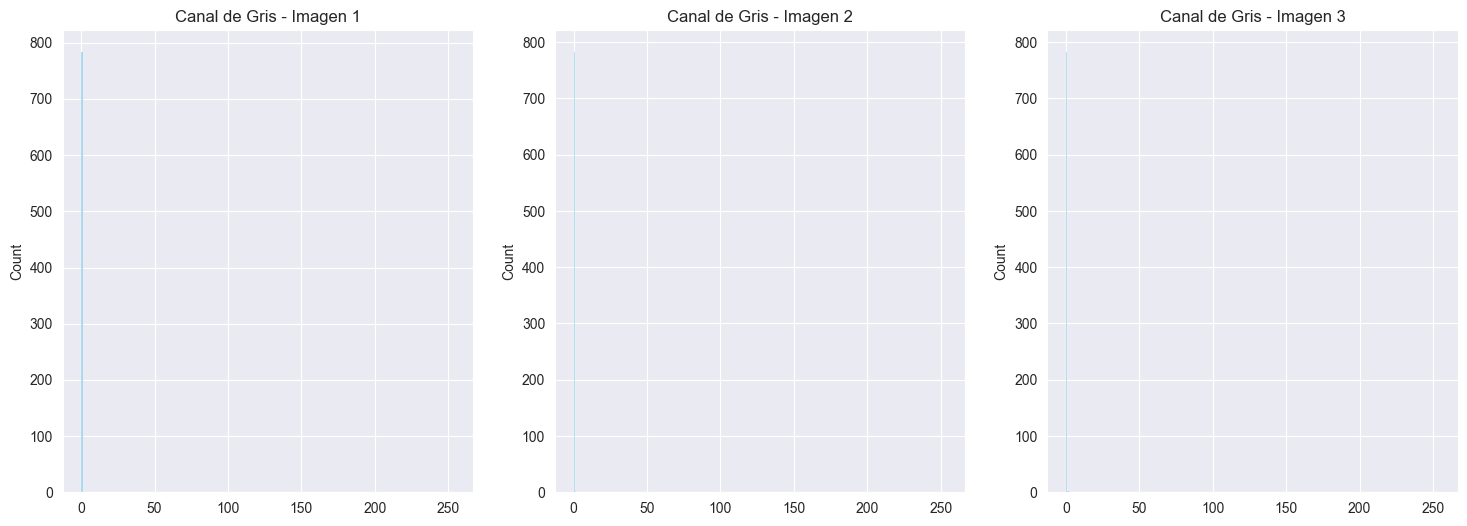

In [29]:
# Seleccionar las primeras 3 imágenes para visualizar
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
images = x_train[:3]

# Crear la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Para cada imagen
for i, ax in enumerate(axes):
    # Obtener la imagen y aplanarla
    img = images[i]
    img_flat = img.ravel()
    
    # Crear el histograma de la imagen
    sns.histplot(img_flat, bins=np.arange(0, 255), ax=ax, color='skyblue')
    ax.set_title(f'Canal de Gris - Imagen {i+1}')

plt.show()